In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import os
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
pp_df = pd.read_csv('data/Global Power Plant.csv')

In [3]:
pp_df

,Country,Powerplant Name,gppd_idnr,Capacity (MW),Latitude,Longitude,Primary Fuel,Owner,Source
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,GEODB
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,GEODB
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,GEODB
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,GEODB
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,GEODB
...,...,...,...,...,...,...,...,...,...
29905,Zambia,Ndola,WRI1022386,50.00,-12.9667,28.6333,Oil,ZESCO,Energy Regulation Board of Zambia
29906,Zambia,Nkana,WRI1022384,20.00,-12.8167,28.2000,Oil,ZESCO,Energy Regulation Board of Zambia
29907,Zambia,Victoria Falls,WRI1022380,108.00,-17.9167,25.8500,Hydro,ZESCO,Energy Regulation Board of Zambia
29908,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,-18.3835,26.4700,Coal,NaN,GEODB


/var/folders/gl/919514x5085c7h3zzn_f471w0000gp/T/ipykernel_34972/2058316854.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, num_categories)


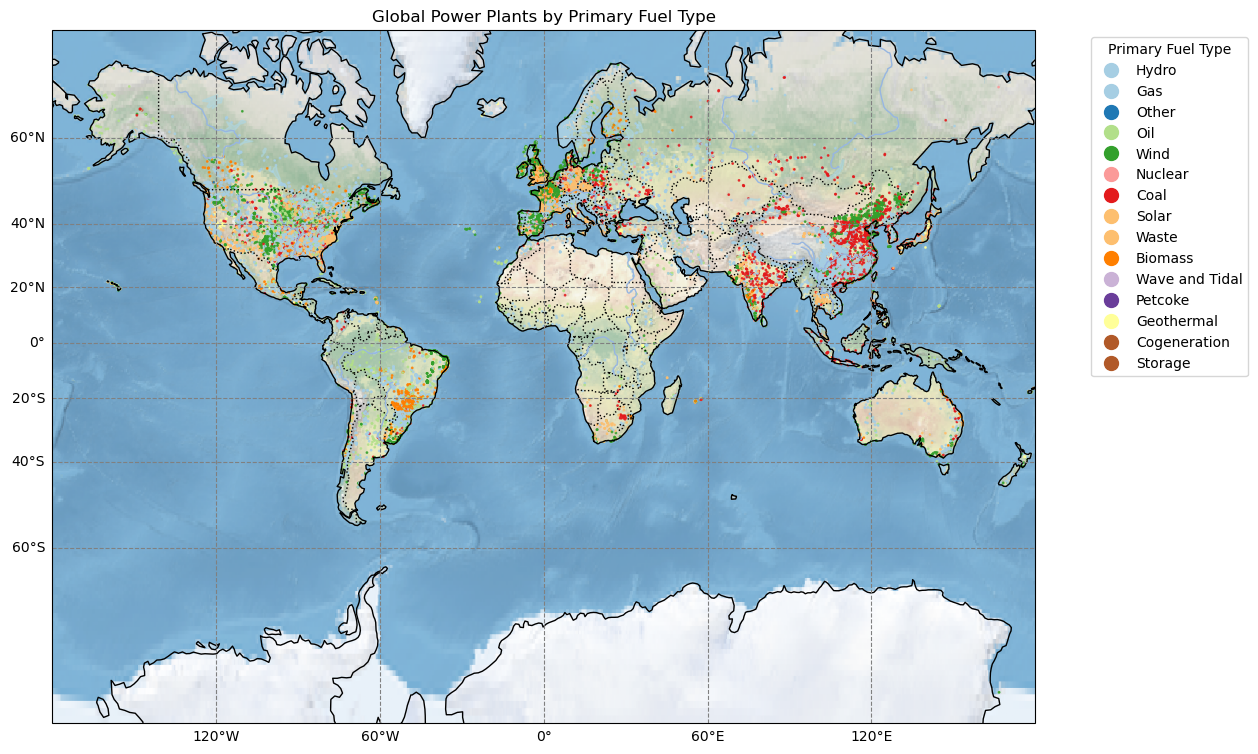

In [4]:
fig = plt.figure(figsize=(20,9))

_map = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

_map.add_feature(cfeature.LAND, color='lightgray')
_map.add_feature(cfeature.OCEAN, color='lightblue')
_map.add_feature(cfeature.COASTLINE)
_map.add_feature(cfeature.BORDERS, linestyle=':')
_map.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')
_map.add_feature(cfeature.RIVERS)

levels, categories = pd.factorize(pp_df['Primary Fuel'])

num_categories = len(categories)

cmap_name = 'Paired'

cmap = plt.cm.get_cmap(cmap_name, num_categories)

scatter = _map.scatter(pp_df['Longitude'],
                      pp_df['Latitude'],
                      c=levels,
                      cmap=cmap,
                      s=1,
                      alpha=0.8,
                      transform=ccrs.PlateCarree())

gl = _map.gridlines(draw_labels=True,
                    dms=True,
                    x_inline=False,
                    y_inline=False,
                    color='gray',
                    linestyle='--')

_map.stock_img()

gl.top_labels = False

gl.right_labels = False

handles = []

# Manually create a legend handle (a proxy scatter point) for each category
for i, category in enumerate(categories):
    handle = mlines.Line2D([], [], color=cmap(i), marker='o', linestyle='None',
                          markersize=10, label=category)
    handles.append(handle)

# Add the legend using the custom handles
_map.legend(handles=handles, title="Primary Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')

_map.set_title('Global Power Plants by Primary Fuel Type')

plt.show()

<h3>AI Generated Code</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

# Assume pp_df is your existing DataFrame

# Factorize the 'Primary Fuel' column to get numerical levels and category names
levels, categories = pd.factorize(pp_df['Primary Fuel'])
num_categories = len(categories)

# Choose a qualitative colormap like 'Paired', 'tab10', 'Set1', or 'Dark2'
# Ensure the colormap has enough distinct colors for all categories
cmap_name = 'Paired'
cmap = plt.cm.get_cmap(cmap_name, num_categories) # Use get_cmap for discrete colors

fig = plt.figure(figsize=(20,11))
# Store the scatter plot object
scatter = plt.scatter(pp_df['Longitude'], pp_df['Latitude'], c=levels, cmap=cmap, s=1, alpha=0.8)

# --- Code to generate the categorical legend ---

handles = []

# Manually create a legend handle (a proxy scatter point) for each category
for i, category in enumerate(categories):
    handle = mlines.Line2D([], [], color=cmap(i), marker='o', linestyle='None',
                          markersize=10, label=category)
    handles.append(handle)

# Add the legend using the custom handles
plt.legend(handles=handles, title="Primary Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Power Plants by Primary Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout() # Adjust layout to make room for the legend
plt.show()
